In [1]:
import pandas as pd
import numpy as np
# 导入数据
data=pd.read_excel('Call-Center-Dataset.xlsx')[['Call Id','Date']]
# 将时间设为索引
data.index=data['Date']
del data['Date']
# 按小时重采样
data=data.groupby(data.index.to_period('H')).count()
# 将索引变为时间序列
data.index=data.index.astype('datetime64[ns]')
# 填补缺失时间索引
date = pd.date_range('2015-01-01 09',periods=9,freq='H')
for day in pd.date_range('2015-01-02','2015-03-31',freq='D'):
    date=date.union(pd.date_range(str(day)[:10]+' 09',periods=9,freq='H'))
date
data=data.reindex(date)
# 填补缺失值
data=data.fillna(0)

![图片](figure/模型公式.png)

In [2]:
# 划分测试集和训练集
train=list(data.truncate(before='2015-01-01',after='2015-01-22')['Call Id'].values)
test=list(data.truncate(before='2015-01-22')['Call Id'].values)

11.883597883597883
alpha=0.6696584700024637 ,gamma=0.07886162981836675 ,delta=0.07886162981836675 ,omega=0.4836886710448801 ,phi=0.3438134456643031
14.880837359098228


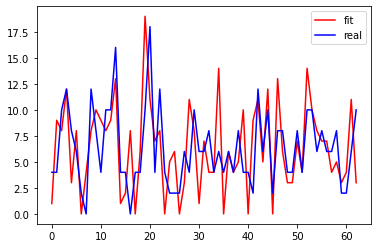

In [3]:
from holtwinter import DoubleSeasonalHoltWinter
dh=DoubleSeasonalHoltWinter(train,test,random_state=3)
print(dh.fit(candidates=10,max_iter=10))
dh.show_paramter()
print(dh.predict())

dh.plot_hat(0,63)

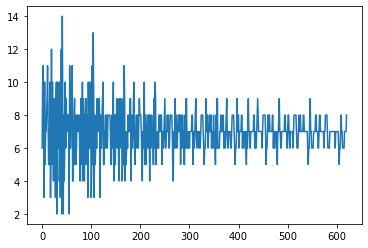

In [4]:
import matplotlib.pyplot as plt
plt.plot(dh.y_preds[:])

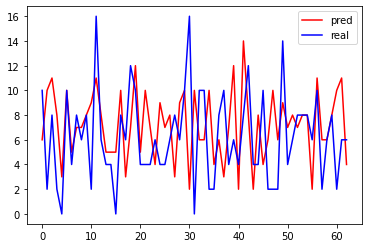

In [5]:
plt.plot(dh.y_preds[:63],'r')
plt.plot(test[:63],'b')
plt.legend(['pred','real'])